# Demonstrate a working controller

## 1. Set up the notebook

Do imports.

In [247]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, IFrame, HTML
from ae483tools import *

Define a function to check mocap data from a given flight.

In [248]:
def check_data(filename):
    # Load data
    raw_data_drone, raw_data_mocap = load_hardware_data(filename)

    # Compute statistics
    how_many_timesteps = len(raw_data_mocap['z'])
    how_many_dropouts = len(np.argwhere(np.isnan(raw_data_mocap['z'])).flatten())
    percent_coverage = 100. * (1. - (how_many_dropouts / how_many_timesteps))
    elapsed_time = raw_data_mocap['time'][-1] - raw_data_mocap['time'][0]
    sample_rate = how_many_timesteps / elapsed_time

    # Plot data (with relevant statistics in the title)
    fig, ax = plt.subplots(1, 1, figsize=(7, 3), tight_layout=True)
    ax.plot(raw_data_mocap['time'], raw_data_mocap['z'])
    ax.set_xlabel('t (seconds)')
    ax.set_ylabel('z (meters)')
    ax.set_ylim(0., 1.)
    ax.set_title(f'({filename}) Tracked {percent_coverage:.1f}% of {how_many_timesteps} time steps at about {sample_rate:.0f} Hz')
    ax.grid()

Define a function to embed videos that have been uploaded to [Illinois Mediaspace](https://mediaspace.illinois.edu/).

In [249]:
def mediaspace(url, width=640, height=397):
    video_id = url.rsplit('/', 1)[-1]
    src = f'https://mediaspace.illinois.edu/embed/secure/iframe/entryId/{video_id}?st=0'
    display(IFrame(src, width=width, height=height))
    display(HTML(f'<a href="{url}" target="_blank">Go to video on Illinois Mediaspace</a>'))

## 2. Check mocap coverage

Check `demonstration_data.json`.

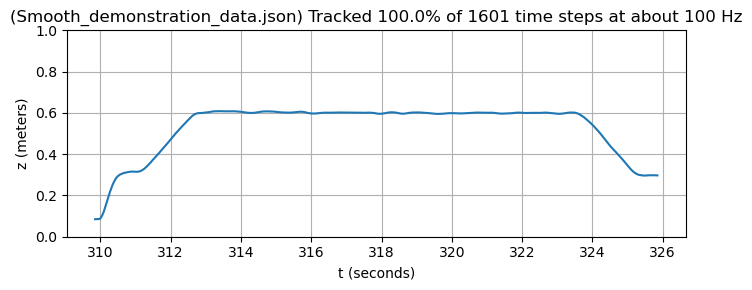

In [250]:
check_data('Smooth_demonstration_data.json')

## 3.1 Show results (without only_in_flight)

Load flight data.

In [251]:
raw_data_drone, raw_data_mocap = load_hardware_data('Smooth_demonstration_data.json')


Resample and parse drone data.

In [252]:
data_drone = resample_data_drone(
    raw_data_drone,
    t_min_offset=0., # <-- FIXME
    t_max_offset=0., # <-- FIXME
)

# time
t = data_drone['time']

# position
p_x = data_drone['ae483log.p_x']
p_y = data_drone['ae483log.p_y']
p_z = data_drone['ae483log.p_z']

# desired position
p_x_des = data_drone['ae483log.p_x_des']
p_y_des = data_drone['ae483log.p_y_des']
p_z_des = data_drone['ae483log.p_z_des']

# orientation
psi = data_drone['ae483log.psi']
theta = data_drone['ae483log.theta']
phi = data_drone['ae483log.phi']

# motor power commands
m_1 = data_drone['ae483log.m_1']
m_2 = data_drone['ae483log.m_2']
m_3 = data_drone['ae483log.m_3']
m_4 = data_drone['ae483log.m_4']

Resample and parse mocap data (with an optimal time shift and with coordinate transformation).

In [253]:
data_mocap = sync_data_mocap(raw_data_mocap, t, p_z)

p_x_mocap = data_mocap['x']
p_y_mocap = data_mocap['y']
p_z_mocap = data_mocap['z']
psi_mocap = data_mocap['yaw']
theta_mocap = data_mocap['pitch']
phi_mocap = data_mocap['roll']

Plot $x, y$ data.

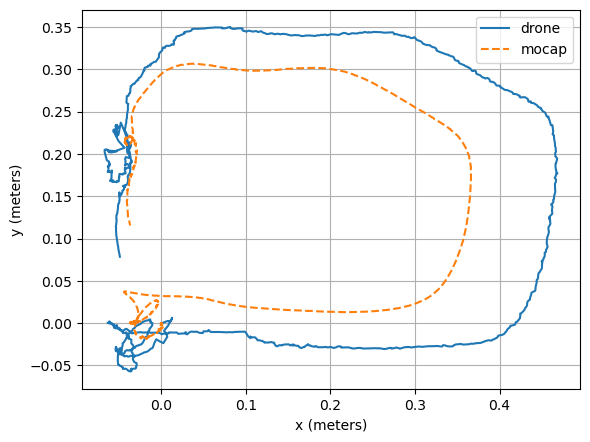

In [254]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)
ax.plot(p_x, p_y, label='drone')
ax.plot(p_x_mocap, p_y_mocap, '--', label='mocap')
ax.set_aspect('equal')
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.legend()
ax.grid()

Plot all data.

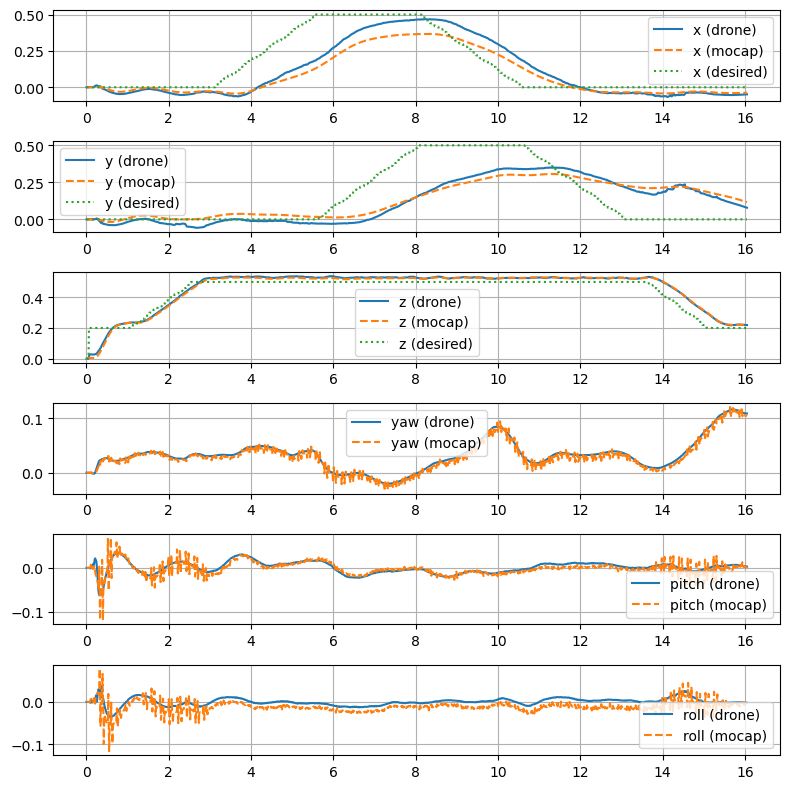

In [255]:
fig, (ax_x, ax_y, ax_z, ax_psi, ax_theta, ax_phi) = plt.subplots(6, 1, figsize=(8, 8), tight_layout=True)

ax_x.plot(t, p_x, label='x (drone)')
ax_x.plot(t, p_x_mocap, '--', label='x (mocap)')
ax_x.plot(t, p_x_des, ':', label='x (desired)')
ax_x.legend()
ax_x.grid()

ax_y.plot(t, p_y, label='y (drone)')
ax_y.plot(t, p_y_mocap, '--', label='y (mocap)')
ax_y.plot(t, p_y_des, ':', label='y (desired)')
ax_y.legend()
ax_y.grid()

ax_z.plot(t, p_z, label='z (drone)')
ax_z.plot(t, p_z_mocap, '--', label='z (mocap)')
ax_z.plot(t, p_z_des, ':', label='z (desired)')
ax_z.legend()
ax_z.grid()

ax_psi.plot(t, psi, label='yaw (drone)')
ax_psi.plot(t, psi_mocap, '--', label='yaw (mocap)')
ax_psi.legend()
ax_psi.grid()

ax_theta.plot(t, theta, label='pitch (drone)')
ax_theta.plot(t, theta_mocap, '--', label='pitch (mocap)')
ax_theta.legend()
ax_theta.grid()

ax_phi.plot(t, phi, label='roll (drone)')
ax_phi.plot(t, phi_mocap, '--', label='roll (mocap)')
ax_phi.legend()
ax_phi.grid()

## 3.2 Show results (with only_in_flight)

In [256]:
raw_data_drone, raw_data_mocap = load_hardware_data('Smooth_demonstration_data.json')


In [257]:
data_drone = resample_data_drone(
    raw_data_drone,
    t_min_offset=0., # <-- FIXME
    t_max_offset=0., # <-- FIXME
)

# time
t = data_drone['time']

# position
p_x = data_drone['ae483log.p_x']
p_y = data_drone['ae483log.p_y']
p_z = data_drone['ae483log.p_z']

# desired position
p_x_des = data_drone['ae483log.p_x_des']
p_y_des = data_drone['ae483log.p_y_des']
p_z_des = data_drone['ae483log.p_z_des']

# orientation
psi = data_drone['ae483log.psi']
theta = data_drone['ae483log.theta']
phi = data_drone['ae483log.phi']

# motor power commands
m_1 = data_drone['ae483log.m_1']
m_2 = data_drone['ae483log.m_2']
m_3 = data_drone['ae483log.m_3']
m_4 = data_drone['ae483log.m_4']


In [258]:
data_mocap = sync_data_mocap(raw_data_mocap, t, p_z)

p_x_mocap = data_mocap['x']
p_y_mocap = data_mocap['y']
p_z_mocap = data_mocap['z']
psi_mocap = data_mocap['yaw']
theta_mocap = data_mocap['pitch']
phi_mocap = data_mocap['roll']


In [259]:
only_in_flight(data_drone, data_mocap=data_mocap, t_interval=10.)

In [267]:
p_x_rmse = np.sqrt(np.mean((p_x - p_x_des)**2))
p_y_rmse = np.sqrt(np.mean((p_y - p_y_des)**2))
p_z_rmse = np.sqrt(np.mean((p_z - p_z_des)**2))

psi_rmse = np.sqrt(np.mean((psi - 0.)**2))
theta_rmse = np.sqrt(np.mean((theta - 0.)**2))
phi_rmse = np.sqrt(np.mean((phi - 0.)**2))

flight_number = 'Smooth Demonstration Drone Data'
key_changes = 'Smooth Flight'
print(f'| {flight_number} | {p_x_rmse:.3f} | {p_y_rmse:.3f} | {p_z_rmse:.3f} | {psi_rmse:.3f} | {theta_rmse:.3f} | {phi_rmse:.3f} | {key_changes} |')

p_x_mocap_rmse = np.sqrt(np.mean((p_x_mocap - p_x_des)**2))
p_y_mocap_rmse = np.sqrt(np.mean((p_y_mocap - p_y_des)**2))
p_z_mocap_rmse = np.sqrt(np.mean((p_z_mocap - p_z_des)**2))

psi_mocap_rmse = np.sqrt(np.mean((psi_mocap - 0.)**2))
theta_mocap_rmse = np.sqrt(np.mean((theta_mocap - 0.)**2))
phi_mocap_rmse = np.sqrt(np.mean((phi_mocap - 0.)**2))

flight_number = 'Smooth Demonstration Mocap Data'
key_changes = 'Smooth Flight'
print(f'| {flight_number} | {p_x_mocap_rmse:.3f} | {p_y_mocap_rmse:.3f} | {p_z_mocap_rmse:.3f} | {psi_mocap_rmse:.3f} | {theta_mocap_rmse:.3f} | {phi_mocap_rmse:.3f} | {key_changes} |')



| Smooth Demonstration Drone Data | 0.125 | 0.159 | 0.044 | 0.043 | 0.013 | 0.009 | Smooth Flight |
| Smooth Demonstration Mocap Data | 0.138 | 0.165 | 0.046 | 0.040 | 0.014 | 0.017 | Smooth Flight |


The RMSE values for the mocap position data all increased from the drone position data, showing mocap position in the x,y,z directions was consistently slightly offset when compared to the drone data RMSE values. The psi mocap RMSE decreased, theta mocap RMSE increased slightly, and phi mocap RMSE increased significantly. The variation in the RMSE of the mocap position can be attributed to inherent inaccuracies of the mocap system, which could happen in the coordinate transformations or when the mocap data is aligned with the drone data. 

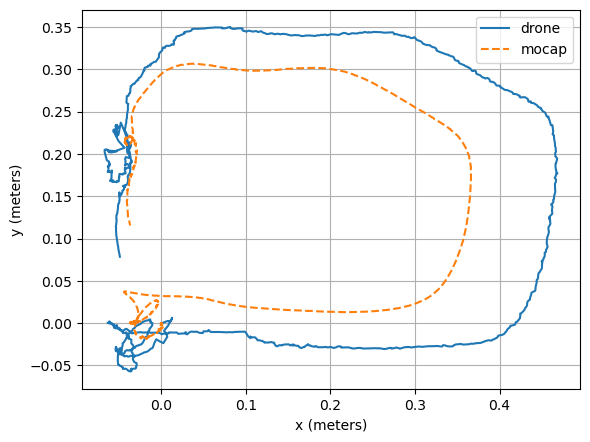

In [268]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)
ax.plot(p_x, p_y, label='drone')
ax.plot(p_x_mocap, p_y_mocap, '--', label='mocap')
ax.set_aspect('equal')
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.legend()
ax.grid()

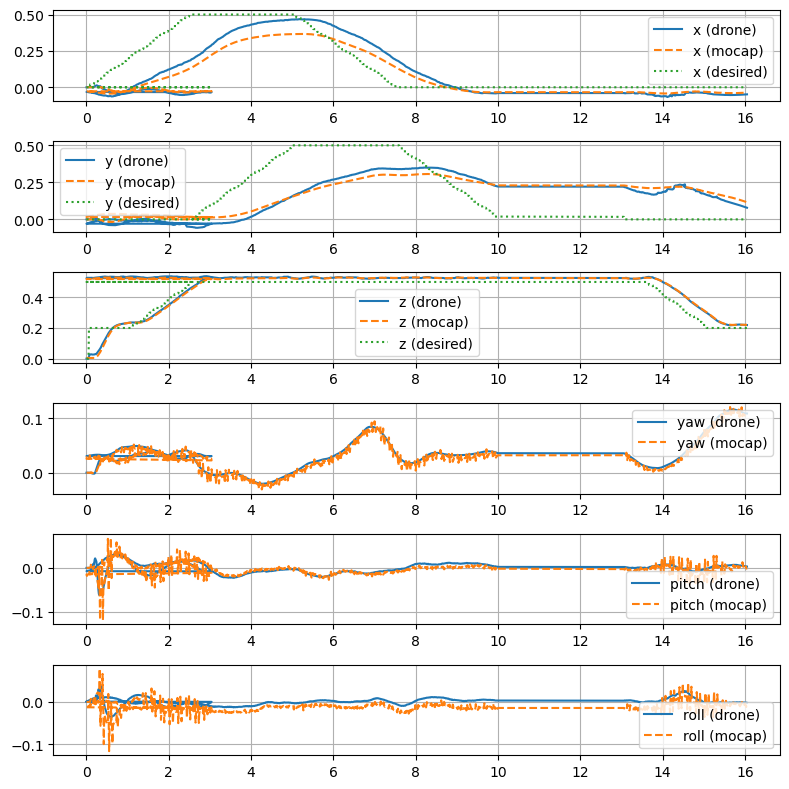

In [269]:
fig, (ax_x, ax_y, ax_z, ax_psi, ax_theta, ax_phi) = plt.subplots(6, 1, figsize=(8, 8), tight_layout=True)

ax_x.plot(t, p_x, label='x (drone)')
ax_x.plot(t, p_x_mocap, '--', label='x (mocap)')
ax_x.plot(t, p_x_des, ':', label='x (desired)')
ax_x.legend()
ax_x.grid()

ax_y.plot(t, p_y, label='y (drone)')
ax_y.plot(t, p_y_mocap, '--', label='y (mocap)')
ax_y.plot(t, p_y_des, ':', label='y (desired)')
ax_y.legend()
ax_y.grid()

ax_z.plot(t, p_z, label='z (drone)')
ax_z.plot(t, p_z_mocap, '--', label='z (mocap)')
ax_z.plot(t, p_z_des, ':', label='z (desired)')
ax_z.legend()
ax_z.grid()

ax_psi.plot(t, psi, label='yaw (drone)')
ax_psi.plot(t, psi_mocap, '--', label='yaw (mocap)')
ax_psi.legend()
ax_psi.grid()

ax_theta.plot(t, theta, label='pitch (drone)')
ax_theta.plot(t, theta_mocap, '--', label='pitch (mocap)')
ax_theta.legend()
ax_theta.grid()

ax_phi.plot(t, phi, label='roll (drone)')
ax_phi.plot(t, phi_mocap, '--', label='roll (mocap)')
ax_phi.legend()
ax_phi.grid()

In the following cell, show a video of your hardware flight test (change the url as appropriate).

In [270]:
# FIXME (REPLACE URL TO SHOW A VIDEO OF YOUR FLIGHT)
#mediaspace('https://mediaspace.illinois.edu/media/t/YOUR_VIDEO_ID')
mediaspace('https://mediaspace.illinois.edu/media/t/1_zoklcu3d')

## 4. Reflect

**Modify the text in this cell** to describe, in at least two or three sentences, the biggest struggle you had (with the technical material, with collaboration, etc.) and the most important thing that you learned. Look back at your reflection from Lab 4 — have you taken a step forward? Think ahead to next week, when you will be asked to further improve the performance of your controller — what might you do in order to make that process go well?

* Charge the drone, learned troubleshooting techniques and what effects the drone performance in regards to hardware (propellors, battery level, motors) and firmware (correctly flashing, trial and error in trying different weights)